# Data Wrangling and EDA

The Consumer Financial Protection Bureau is an independent agency of the United States government responsible for consumer protection in the financial sector. Complaints that the CFPB sends to companies for response are published in the Consumer Complaint Database after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first.

The data below is associated to complaints filed in 2022 and the complaints that have consumer narratives ('Consumer complaint narrative'). Our target variable is the binary variable 'Timely response?'. 

| Field Name                   | Description                                                                                                | Type        |
|------------------------------|------------------------------------------------------------------------------------------------------------|-------------|
| Date received                | The date the CFPB received the complaint                                                                   | datetime    |
| Product                      | Type of product in complaint                                                                               | categorical |
| Sub-product                  | Type of sub-product                                                                                        | categorical |
| Issue                        | The issue the consumer identified in the complaint                                                         | categorical |
| Sub-issue                    | The sub-issue the consumer identified in the complaint                                                     | categorical |
| Consumer complaint narrative | Consumer complaint narrative is the consumer-submitted  description of "what happened" from the complaint. | text        |
| Company public response      | The company's optional, public-facing response to a consumer's complaint.                                  | text        |
| Company                      |                                                                                                            | categorical |
| State                        |                                                                                                            | categorical |
| ZIP code                     |                                                                                                            | number      |
| Tags                         |                                                                                                            | text        |
| Consumer consent provided?   | Identifies whether the consumer opted in to publish their complaint narrative.                             | categorical |
| Submitted via                | How the complaint was submitted to the CFPB                                                                | categorical |
| Date sent to company         | The date the CFPB sent the complaint to the company                                                        | datetime    |
| Company response to consumer | This is how the company responded.                                                                         | categorical |
| Timely response?             | Whether the company gave a timely response                                                                 | binary      |
| Consumer disputed?           | Whether the consumer disputed the company’s response                                                       | binary      |
| Complaint ID                 | The unique identification number for a complaint                                                           | number      |

In [22]:
#import packages for data wrangling and EDA
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('complaints-2024-07-16_13_58.csv')

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/26/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not a duplicate nor is this complaint ...,NaN,"EQUIFAX, INC.",NY,10952,NaN,Consent provided,Web,08/26/22,Closed with explanation,Yes,NaN,5915765
1,03/07/22,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,"As by Law, under 15 U.S Code 1601- Congression...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MD,20770,NaN,Consent provided,Web,03/07/22,Closed with non-monetary relief,Yes,NaN,5292064
2,03/07/22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I am a victim of Identity theft. Please delete...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,27610,NaN,Consent provided,Web,03/07/22,Closed with explanation,Yes,NaN,5292231
3,04/16/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,I am very concerned about the items that are b...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,23234,NaN,Consent provided,Web,04/16/22,Closed with non-monetary relief,Yes,NaN,5456090
4,03/07/22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,My credit reports are inaccurate. These inaccu...,NaN,"EQUIFAX, INC.",CA,92563,NaN,Consent provided,Web,03/07/22,Closed with explanation,Yes,NaN,5292229


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328213 entries, 0 to 328212
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date received                 328213 non-null  object 
 1   Product                       328213 non-null  object 
 2   Sub-product                   328209 non-null  object 
 3   Issue                         328213 non-null  object 
 4   Sub-issue                     304375 non-null  object 
 5   Consumer complaint narrative  328213 non-null  object 
 6   Company public response       182069 non-null  object 
 7   Company                       328213 non-null  object 
 8   State                         327248 non-null  object 
 9   ZIP code                      328213 non-null  object 
 10  Tags                          37017 non-null   object 
 11  Consumer consent provided?    328213 non-null  object 
 12  Submitted via                 328213 non-nul

How many unique companies are there?

In [6]:
df.Company.nunique()

2732

Note that the 'Timely response?' target is imbalanced. The CFPB website even says "98% of complaints sent to companies get timely responses". 

In [10]:
df['Timely response?'].value_counts()

Timely response?
Yes    325534
No       2679
Name: count, dtype: int64

In [14]:
df[df['Timely response?']=='No'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2679 entries, 504 to 328131
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 2679 non-null   object 
 1   Product                       2679 non-null   object 
 2   Sub-product                   2679 non-null   object 
 3   Issue                         2679 non-null   object 
 4   Sub-issue                     2210 non-null   object 
 5   Consumer complaint narrative  2679 non-null   object 
 6   Company public response       948 non-null    object 
 7   Company                       2679 non-null   object 
 8   State                         2670 non-null   object 
 9   ZIP code                      2679 non-null   object 
 10  Tags                          435 non-null    object 
 11  Consumer consent provided?    2679 non-null   object 
 12  Submitted via                 2679 non-null   object 
 13  Date

The following features do not seem useful in determing whether there was a timely response. 

- 'Date received', 'Submitted via', 'Date sent to company': how and when should be irrelevant 
- 'Company public response', 'Company response to consumer': this is optional on the company's end
- 'State', 'ZIP code': where is irrelevant
- 'Tags', 'Consumer consent provided?', 'Consumer disputed?', 'Complaint ID': this customer identification is irrelevant

In [5]:
columns_to_drop=['Date received','Company public response','State','ZIP code','Tags','Consumer consent provided?','Submitted via','Date sent to company','Company response to consumer','Consumer disputed?','Complaint ID']

In [6]:
df.drop(columns_to_drop,axis=1).head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,Timely response?
0,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not a duplicate nor is this complaint ...,"EQUIFAX, INC.",Yes
1,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,"As by Law, under 15 U.S Code 1601- Congression...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
2,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I am a victim of Identity theft. Please delete...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes
3,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,I am very concerned about the items that are b...,Experian Information Solutions Inc.,Yes
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,My credit reports are inaccurate. These inaccu...,"EQUIFAX, INC.",Yes


Let's examine some common issues, first for the whole dataset and then for when complaints do not get timely responses.

In [51]:
df['Issue'].value_counts().head(10)

Issue
Incorrect information on your report                                                80390
Improper use of your report                                                         80231
Problem with a credit reporting company's investigation into an existing problem    65143
Attempts to collect debt not owed                                                   15213
Managing an account                                                                  9831
Trouble during payment process                                                       5856
Written notification about debt                                                      5726
Problem with a purchase shown on your statement                                      5389
Fraud or scam                                                                        3659
Dealing with your lender or servicer                                                 3211
Name: count, dtype: int64

In [52]:
df['Sub-issue'].value_counts().head(10)

Sub-issue
Reporting company used your report improperly               66982
Information belongs to someone else                         49863
Their investigation did not fix an error on your report     41513
Credit inquiries on your report that you don't recognize    12704
Account information incorrect                               10964
Was not notified of investigation status or results         10820
Account status incorrect                                    10494
Investigation took more than 30 days                         9322
Debt is not yours                                            7427
Debt was result of identity theft                            4737
Name: count, dtype: int64

In [53]:
df[df['Timely response?']=='No']['Issue'].value_counts().head(10)

Issue
Attempts to collect debt not owed                                                   442
Incorrect information on your report                                                291
Written notification about debt                                                     181
Improper use of your report                                                         164
Problem with a credit reporting company's investigation into an existing problem    129
Managing an account                                                                 129
Took or threatened to take negative or legal action                                 125
False statements or representation                                                  125
Communication tactics                                                                73
Problem with a purchase shown on your statement                                      70
Name: count, dtype: int64

In [54]:
df[df['Timely response?']=='No']['Company'].value_counts().head(10)

Company
BANK OF AMERICA, NATIONAL ASSOCIATION               268
CLGF Holdco 1, LLC                                  183
TRUIST FINANCIAL CORPORATION                        109
Self Financial Inc.                                  76
HCFS Healthcare Financial Services of TeamHealth     68
CCS Financial Services, Inc.                         67
Commonwealth Financial Systems, Inc.                 46
AmerAssist A/R Solutions, Inc.                       41
SANTANDER BANK, NATIONAL ASSOCIATION                 39
Sezzle Inc.                                          36
Name: count, dtype: int64

Let's examine what makes up the majority of the untimely response complaints.

In [16]:
filtered_df = df[df['Timely response?']=='No'].drop(columns_to_drop,axis=1)

In [36]:
filtered_df.columns

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company', 'Timely response?'],
      dtype='object')

In [37]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2679 entries, 504 to 328131
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       2679 non-null   object
 1   Sub-product                   2679 non-null   object
 2   Issue                         2679 non-null   object
 3   Sub-issue                     2210 non-null   object
 4   Consumer complaint narrative  2679 non-null   object
 5   Company                       2679 non-null   object
 6   Timely response?              2679 non-null   object
dtypes: object(7)
memory usage: 167.4+ KB


In [36]:
for col in filtered_df.columns:
    print(f"Highest Value Count in {col}:")
    print(df[df['Timely response?']=='No'][col].value_counts().iloc[0])

Highest Value Count in Product:
974
Highest Value Count in Sub-product:
532
Highest Value Count in Issue:
442
Highest Value Count in Sub-issue:
230
Highest Value Count in Consumer complaint narrative:
4
Highest Value Count in Company:
268
Highest Value Count in Timely response?:
2679


Frequency histogram for Product:


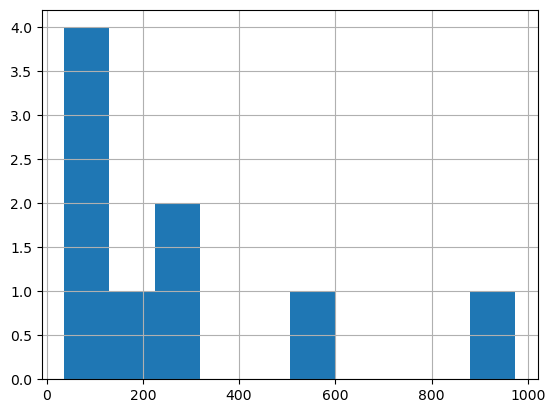

Frequency histogram for Sub-product:


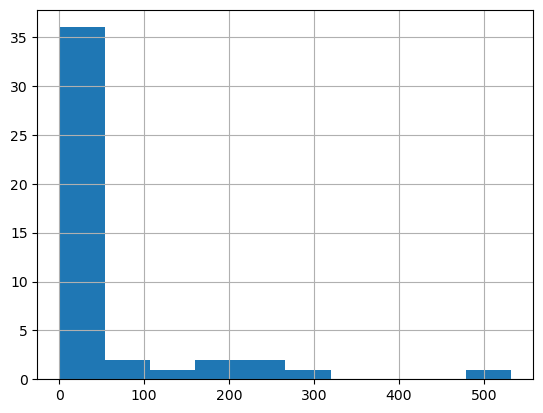

Frequency histogram for Issue:


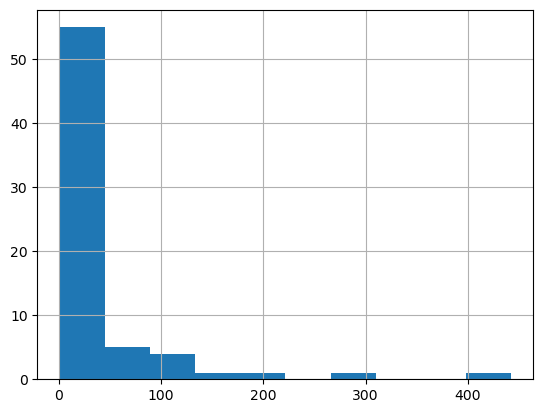

Frequency histogram for Sub-issue:


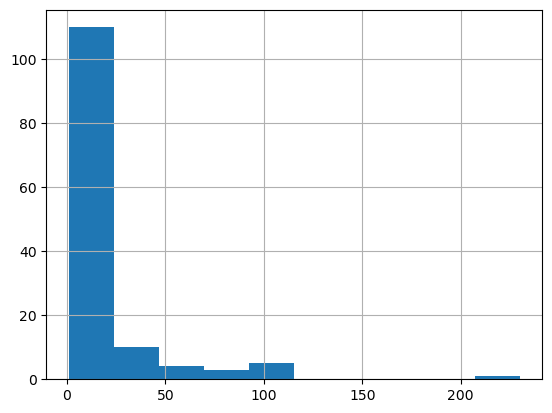

Frequency histogram for Consumer complaint narrative:


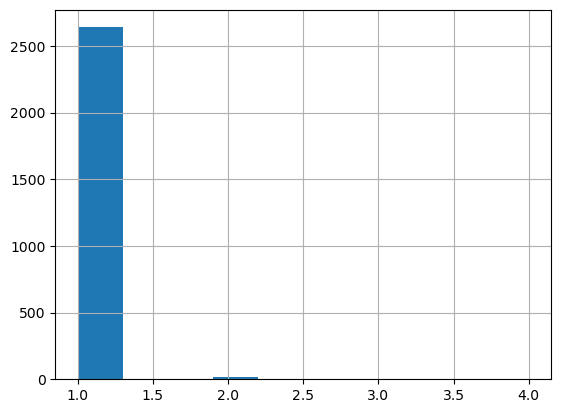

Frequency histogram for Company:


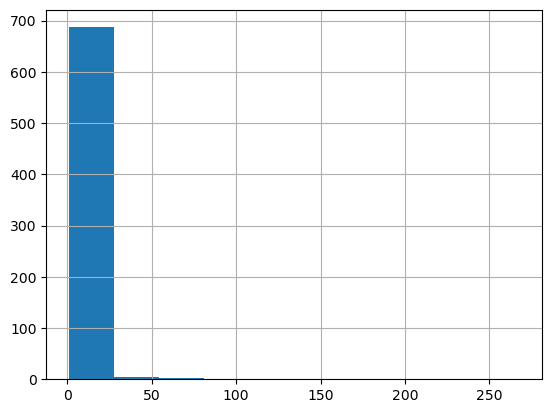

Frequency histogram for Timely response?:


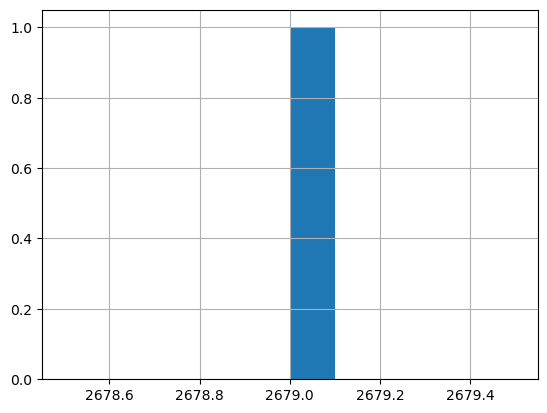

In [23]:
for col in filtered_df.columns:
    print(f"Frequency histogram for {col}:")
    filtered_df[col].value_counts().hist()
    plt.show()

Let's examine the top 10 companies that do not give timely responses and in terms of percentage.

In [56]:
vc = df[df['Timely response?']=='No']['Company'].value_counts()

In [59]:
print(vc[vc > 10].head(10))

Company
BANK OF AMERICA, NATIONAL ASSOCIATION               268
CLGF Holdco 1, LLC                                  183
TRUIST FINANCIAL CORPORATION                        109
Self Financial Inc.                                  76
HCFS Healthcare Financial Services of TeamHealth     68
CCS Financial Services, Inc.                         67
Commonwealth Financial Systems, Inc.                 46
AmerAssist A/R Solutions, Inc.                       41
SANTANDER BANK, NATIONAL ASSOCIATION                 39
Sezzle Inc.                                          36
Name: count, dtype: int64


In [58]:
print(vc[vc > 10].head(10)/len(filtered_df))

Company
BANK OF AMERICA, NATIONAL ASSOCIATION               0.100037
CLGF Holdco 1, LLC                                  0.068309
TRUIST FINANCIAL CORPORATION                        0.040687
Self Financial Inc.                                 0.028369
HCFS Healthcare Financial Services of TeamHealth    0.025383
CCS Financial Services, Inc.                        0.025009
Commonwealth Financial Systems, Inc.                0.017171
AmerAssist A/R Solutions, Inc.                      0.015304
SANTANDER BANK, NATIONAL ASSOCIATION                0.014558
Sezzle Inc.                                         0.013438
Name: count, dtype: float64


We will now do a chi-square analysis on which on the remaining categorical features (that is, not including customer narrative) contribute the most to timely response.

In [60]:
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
import re

# Define the features and target
features = df[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company']]
target = df['Timely response?'].apply(lambda x: 1 if x == 'Yes' else 0)

# Fill missing values in 'Sub-issue' column
features['Sub-issue'] = features['Sub-issue'].fillna('Unknown')
features['Sub-product'] = features['Sub-product'].fillna('Unknown')


# Encode categorical features
encoder = OrdinalEncoder()
encoded_features = encoder.fit_transform(features)

# Chi-Square Test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(encoded_features, target)
chi2_scores = chi2_selector.scores_

# Mutual Information
mi_selector = mutual_info_classif(encoded_features, target)
mi_scores = mi_selector

# Create a DataFrame to display the scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Chi2 Score': chi2_scores,
    'Mutual Information': mi_scores
})

print(feature_scores)

C:\Users\Whyme\AppData\Local\Temp\ipykernel_988\3233475035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sub-issue'] = features['Sub-issue'].fillna('Unknown')
C:\Users\Whyme\AppData\Local\Temp\ipykernel_988\3233475035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sub-product'] = features['Sub-product'].fillna('Unknown')


       Feature    Chi2 Score  Mutual Information
0      Product    438.308877            0.035215
1  Sub-product  11637.511203            0.025939
2        Issue    116.840417            0.015106
3    Sub-issue   3821.315159            0.013039
4      Company  63423.890990            0.033162


In [47]:
feature_scores.sort_values(by='Mutual Information', ascending=False)

,Feature,Chi2 Score,Mutual Information
0,Product,438.308877,0.035797
4,Company,63423.890990,0.033308
1,Sub-product,11637.511203,0.026384
2,Issue,116.840417,0.015173
3,Sub-issue,3821.315159,0.013437


The conclusion of this data wrangling and EDA is that the top 3 categorical features are 'Product', 'Company', and 'Sub-product'. We will proceed to do NLP on the customer narrative and do a classification model with "Timely response?' as our target. Note there are only 4 entries that do not contain a 'Sub-product', so we may drop those in the future. 